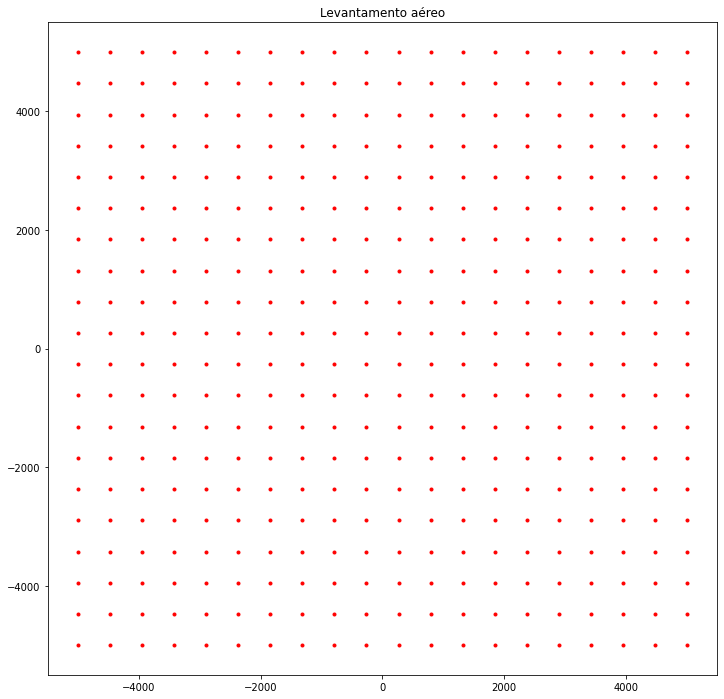

In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import time
from numba import jit
from numba.typed import List
a = sys.path.append('../modules/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array, graphs_and_dist

acquisition = {'nx': 20,
                  'ny': 20,
                  'xmin': -5000,
                  'xmax': 5000,
                  'ymin': -5000,
                  'ymax': 5000,
                  'z': -50.0,
                  'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

data_cubo = pd.read_table('Logfile/16_04_2021_19_07/data_mag.cvs', sep =',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (20,20))

momento = 75000000000/30 #3.8X10^1/ndip
#print(momento)

#plot_3D.modelo_anomalia_3D(Y, X, tfa_n_bolinhas, coodY, coodX, coodZ, mag)

population = {'xmax': 5000.0,
                'xmin': -5000.0,
                'ymax': 5000.0,
                'ymin': -5000.0,
                'zlim': 7000.0,
                'z_min': 0.0,
                'n_dip': 30,
                'n_pop': 50,
                'inclmax': 5.0,
                'inclmin': -5.0,
                'declmax': 5.0,
                'declmin': -5.0,
                'mmax': momento,
                'mmin': momento,
                'homogeneo': True
                }

I, D = 5.0, 70.0

filhos_mut = {'xmax': 5000.0,
                'xmin': -5000.0,
                'ymax': 5000.0,
                'ymin': -5000.0,
                'zlim': 7000.0,
                'z_min': 0.0,
                'n': 1,
                'inclmax': 5.0,
                'inclmin': -5.0,
                'declmax': 5.0,
                'declmin': -5.0,
                'magmax': momento,
                'magmin': momento,
                'homogeneo': True
                }

In [2]:
populacao = Operators_array.create_population(**population)

In [3]:
populacao = List(populacao)
print(len(populacao))
normal_gama, gama, anomaly, MST, theta, phi = Operators_array.final_fit(X, Y, Z, I, D, populacao, anomaly_cubo, lamb = 0.05)

50


../modules/aux_operators_array.py:143: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'iterable' of function 'min_max_impl.<locals>.impl'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../my_project_env/lib/python3.8/site-packages/numba/cpython/builtins.py", line 554:
    if isinstance(iterable, types.IterableType):
        def impl(iterable):
        ^

  min_f, max_f = min(function), max(function)
/home/romulo/my_project_dir/my_project_env/lib/python3.8/site-packages/numba/core/ir_utils.py:2119: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'function' of function 'normalize'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-refle

In [4]:
n_phi = aux_operators_array.normalize(phi)
n_theta = aux_operators_array.normalize(theta)
print(n_theta)

[0.1302057787451807, 0.08062388648104628, 0.23020790096312804, 0.28367114146177974, 0.18510132227539927, 0.5016274286928133, 0.07471125982828193, 0.29519039057338964, 0.03773600985760634, 0.33272728679057506, 0.05647853754598685, 0.04099114151049507, 0.07812930016359054, 0.32914128539818105, 0.4645860880000919, 0.36952992398127954, 0.06505536910952069, 0.10784449493049128, 0.20543443302516898, 0.19336104661177647, 0.1539738467363407, 0.07572709089698292, 0.1069459018120568, 0.4576574954683378, 0.0, 0.3765687694439272, 0.3544752898105038, 0.27112774503297343, 0.19147823115912385, 0.1663344028574671, 0.17431299220568422, 0.15414888367918933, 0.15710884294018382, 0.09928610522301605, 0.18325691831140406, 0.20877431596154344, 0.04790800920129433, 0.3450395604745006, 0.20252463975640622, 0.26978730231302167, 0.1546002182492011, 0.21006711645642043, 0.00508061607261429, 0.20112627042122477, 0.19828829567634096, 0.29969330093317637, 0.11767816604469422, 0.06494751166633422, 0.2040631519910667

In [5]:
#def constraint_violetion(phi, theta):
choose = []
m_phi = np.mean(phi)
m_theta = np.mean(theta)
for i in range(len(phi)):
    if phi[i] < m_phi and theta[i] < m_theta:
        i_phi = phi.index(phi[i])
        choose.append(populacao[i_phi])

print(len(choose))

25


In [6]:
def constraint_violetion(phi, theta):
    choose = List[]
    m_phi1 = np.mean(n_phi)
    m_theta1 = np.mean(n_theta)
    for i in range(len(phi)):
        if n_phi[i] < m_phi1 - 0.6*m_phi1 and n_theta[i] < m_theta1 - 0.6*m_theta1:
            i_phi1 = n_phi.index(n_phi[i])
            choose.append(populacao[i_phi1])
    
    return choose

print(len(choose1))
print(choose1)

11
[array([[ 2.23967150e+03,  3.47223192e+03,  2.71913097e+03],
       [ 3.11963558e+03,  2.80818915e+03,  5.97628805e+03],
       [ 2.91202756e+03, -4.70934756e+03,  3.02019741e+03],
       [-3.04078899e+03,  7.26979261e+01,  4.74989095e+03],
       [ 4.80780985e+03, -4.43387418e+03,  2.72791722e+03],
       [-9.86663757e+02,  3.97950201e+02,  3.87720296e+03],
       [-9.03726810e+02, -3.60036710e+03,  1.60066382e+03],
       [ 3.05599374e+03, -1.21027584e+03,  6.11696799e+03],
       [-3.25511594e+03, -2.58166950e+03,  5.73603870e+03],
       [-2.67680822e+03, -3.81827951e+03,  1.68952389e+03],
       [ 3.80865110e+03,  3.10635186e+02,  1.98581980e+03],
       [ 2.99543060e+03,  1.97953051e+03,  5.18037220e+03],
       [-2.33621722e+03, -1.04642693e+03,  2.60215602e+03],
       [-2.61475219e+02, -4.27501136e+03,  5.72269822e+03],
       [-2.01618960e+03, -2.07693657e+03,  1.02963832e+03],
       [ 7.37813659e+02,  1.11228891e+03,  4.39942235e+03],
       [ 2.66132855e+02,  4.82439875

In [7]:
pais_ = Operators_array.tournament_selection_ranking_diversit(populacao, normal_gama)
filho_ = Operators_array.crossover_polyamory(pais_)  # Operators_array.uniform_crossover(pais_)
#if (t >= 5) and (val_fit[t] == val_fit[t-5]):
filho_ = Operators_array.mutacao_multi_vhomo(filho_, **filhos_mut, prob_mut = 0.4) #aumenta mut para X
#else:
#filho_ = Operators_array.mutacao_multi_vhomo(filho_, **filhos_mut) #manter mut em 0.05

/home/romulo/my_project_dir/my_project_env/lib/python3.8/site-packages/numba/typed/typedlist.py:118: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'iterable' of function 'impl_extend.<locals>.select_impl.<locals>.impl'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../my_project_env/lib/python3.8/site-packages/numba/typed/listobject.py", line 1080:
        else:
            def impl(l, iterable):
            ^

  return l.extend(iterable)
/home/romulo/my_project_dir/my_project_env/lib/python3.8/site-packages/numba/core/ir_utils.py:2119: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'iterable' of function '_extend'.

For more information visit https://numba.pydata.org/numba-doc/latest/referenc

In [8]:
def elitismo(pop, filhos, fit_cada, n_fica=10):
    n_pop = pop.copy()
    #n_fica = 30
    #n_fica = int(len(pop) - (len(filhos)-(0.2*len(pop)))) Colocar o if!!!
    #print('N fica é =', n_fica)
    fit_cada = np.array(fit_cada)
    df = pd.DataFrame(fit_cada)
    x = df.sort_values(0, ascending=True) #Ordenar os valores de acordo com o menor fit.
    piores = x.index[n_fica:]
    for index, pos in enumerate(piores): #Substituir os piores indivíduos pelos filhos
        n_pop[pos] = filhos[index]
    n_pop = List(n_pop)
    return n_pop

In [14]:
fit, anomaly = Operators_array.fit_value(X, Y, Z, I, D, filho_, anomaly_cubo)
fit_cada = np.array(fit)
df = pd.DataFrame(fit_cada)
x = df.sort_values(0, ascending=True) #Ordenar os valores de acordo com o menor fit.
n_select = len(populacao) - len(choose1)
melhores = x.index[0:n_select]
for i in range(n_select):
    change_index = melhores[i]
    choose1.append(filho_[melhores[i]])

print(len(choose1))

50


In [12]:
print(melhores)
print(len(melhores))
print(melhores[0])

Int64Index([ 6,  5,  7, 77,  4, 74, 30, 47, 78, 79, 56,  2, 46, 31, 52, 55, 26,
            96, 70, 97, 48, 88, 60, 72, 41, 89, 35, 10, 36, 75,  0, 45, 37, 11,
            63, 66, 40, 32, 51],
           dtype='int64')
39
6


In [13]:
print(choose1)

[array([[ 2.23967150e+03,  3.47223192e+03,  2.71913097e+03],
       [ 3.11963558e+03,  2.80818915e+03,  5.97628805e+03],
       [ 2.91202756e+03, -4.70934756e+03,  3.02019741e+03],
       [-3.04078899e+03,  7.26979261e+01,  4.74989095e+03],
       [ 4.80780985e+03, -4.43387418e+03,  2.72791722e+03],
       [-9.86663757e+02,  3.97950201e+02,  3.87720296e+03],
       [-9.03726810e+02, -3.60036710e+03,  1.60066382e+03],
       [ 3.05599374e+03, -1.21027584e+03,  6.11696799e+03],
       [-3.25511594e+03, -2.58166950e+03,  5.73603870e+03],
       [-2.67680822e+03, -3.81827951e+03,  1.68952389e+03],
       [ 3.80865110e+03,  3.10635186e+02,  1.98581980e+03],
       [ 2.99543060e+03,  1.97953051e+03,  5.18037220e+03],
       [-2.33621722e+03, -1.04642693e+03,  2.60215602e+03],
       [-2.61475219e+02, -4.27501136e+03,  5.72269822e+03],
       [-2.01618960e+03, -2.07693657e+03,  1.02963832e+03],
       [ 7.37813659e+02,  1.11228891e+03,  4.39942235e+03],
       [ 2.66132855e+02,  4.82439875e+0

In [16]:
def eletismo_constraint(X, Y, Z, I, D, filho, anomaly, populacao, choose):
    fit, anomaly = Operators_array.fit_value(X, Y, Z, I, D, filho_, anomaly_cubo)
    fit_cada = np.array(fit)
    df = pd.DataFrame(fit_cada)
    x = df.sort_values(0, ascending=True) #Ordenar os valores de acordo com o menor fit.
    n_select = len(populacao) - len(choose)
    melhores = x.index[0:n_select]
    for i in range(n_select):
        change_index = melhores[i]
        choose.append(filho_[melhores[i]])
    
    return choose